In [1]:
import tifffile as tiff
from octvision3d.utils import get_filenames
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
# path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/imagesTr"
# label_path = "/home/mstudxk5/Downloads/DRU/nnUNet_Dataset_v3/labelsTr"

path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/imagesTs"
label_path = "/data/dkermany_data/OCT/nnUNet_raw/Dataset002_NORMALsOnlyCorrected/labelsTs"

color_map = {
    1: "#80ae80",  # CNV
    2: "#f1d691",  # DRU
    3: "#b17a65",  # EX
    4: "#6fb8d2",  # FLU
    5: "#d8654f",  # GA
    6: "#dd8265",  # HEM
    7: "#90ee90",  # RPE
    8: "#a200ff",  # RET
    9: "#8f8f70",  # CHO
    10: "#e1f0fd", # VIT
    11: "#75fafd", # HYA
    12: "#b0fdd1", # SHS
    13: "#fdfd54", # ART
    14: "#387df8", # ERM
    15: "#643200", # SES
}

label_map = {
    1: "CNV",
    2: "DRU",
    3: "EX",
    4: "FLU",
    5: "GA",
    6: "HEM",
    7: "RPE",
    8: "RET",
    9: "CHO",
    10: "VIT",
    11: "HYA",
    12: "SHS",
    13: "ART",
    14: "ERM",
    15: "SES"
}


In [3]:
def plot_bar_graph(label_map, label_count, color_map):
    # Create two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

    # First plot: Regular y-axis bar plot
    sns.barplot(
        x=label_map.values(),
        y=label_count.values(),
        hue=label_map.values(),
        palette=color_map.values(),
        dodge=False,
        legend=False,
        ax=axes[0]
    )
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Count')
    axes[0].set_title('Count of Pixel Categories in Label (Linear Scale)')
    
    # Second plot: Logarithmic y-axis bar plot
    sns.barplot(
        x=label_map.values(),
        y=label_count.values(),
        hue=label_map.values(),
        palette=color_map.values(),
        dodge=False,
        legend=False,
        ax=axes[1]
    )
    axes[1].set_yscale('log')  # Set y-axis to logarithmic scale
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Count (Log Scale)')
    axes[1].set_title('Count of Pixel Categories in Label (Log Scale)')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [4]:
total_label_count = { i: 0 for i in range(1, 16) }

Plotting RAI02_1-13-NORMAL-10-127813_0000.tif pixels


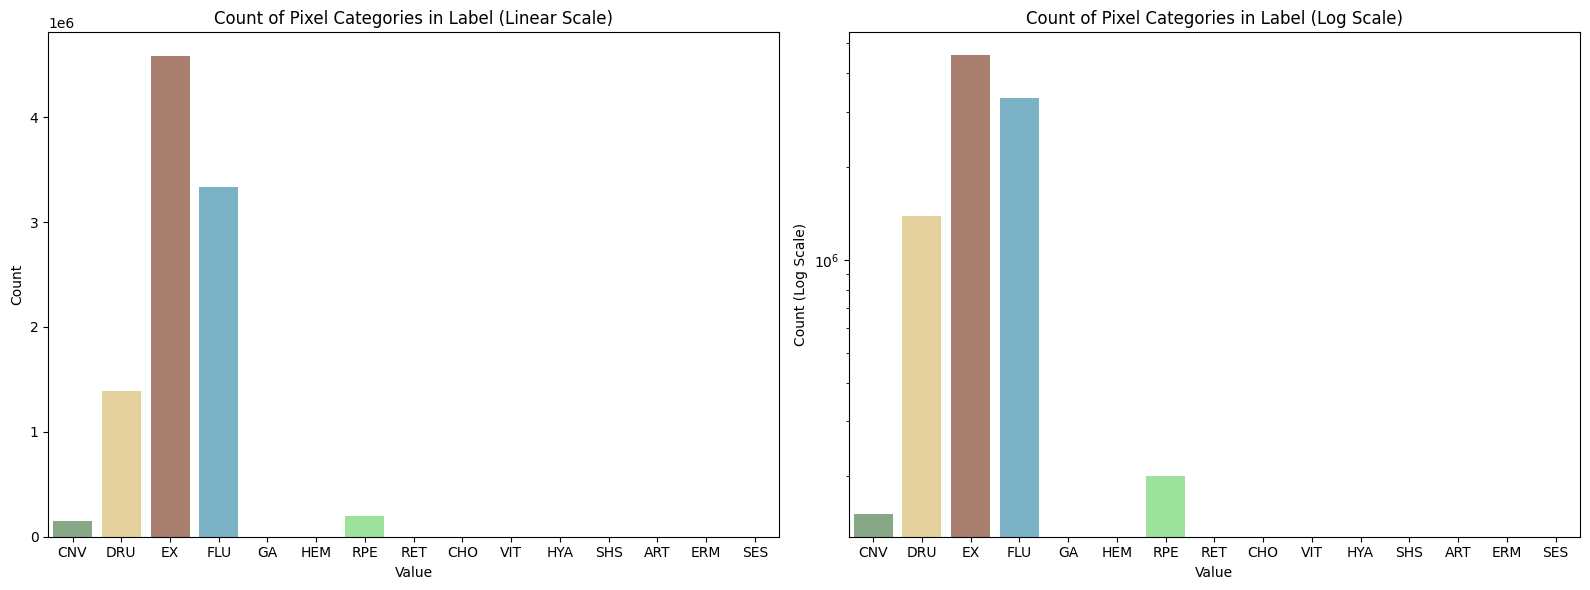

Plotting RAI02_1-15-NORMAL-10-118307_0000.tif pixels


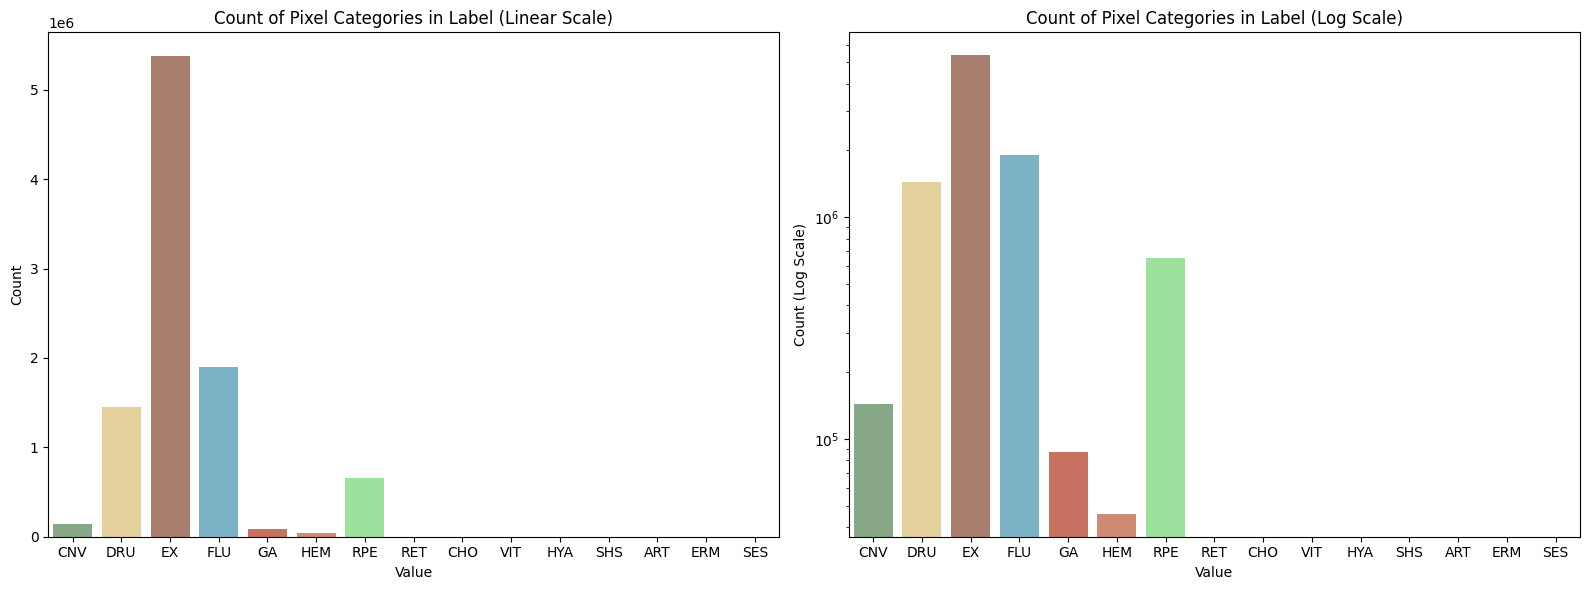

Plotting RAI02_1-29-NORMAL-6-110819_0000.tif pixels


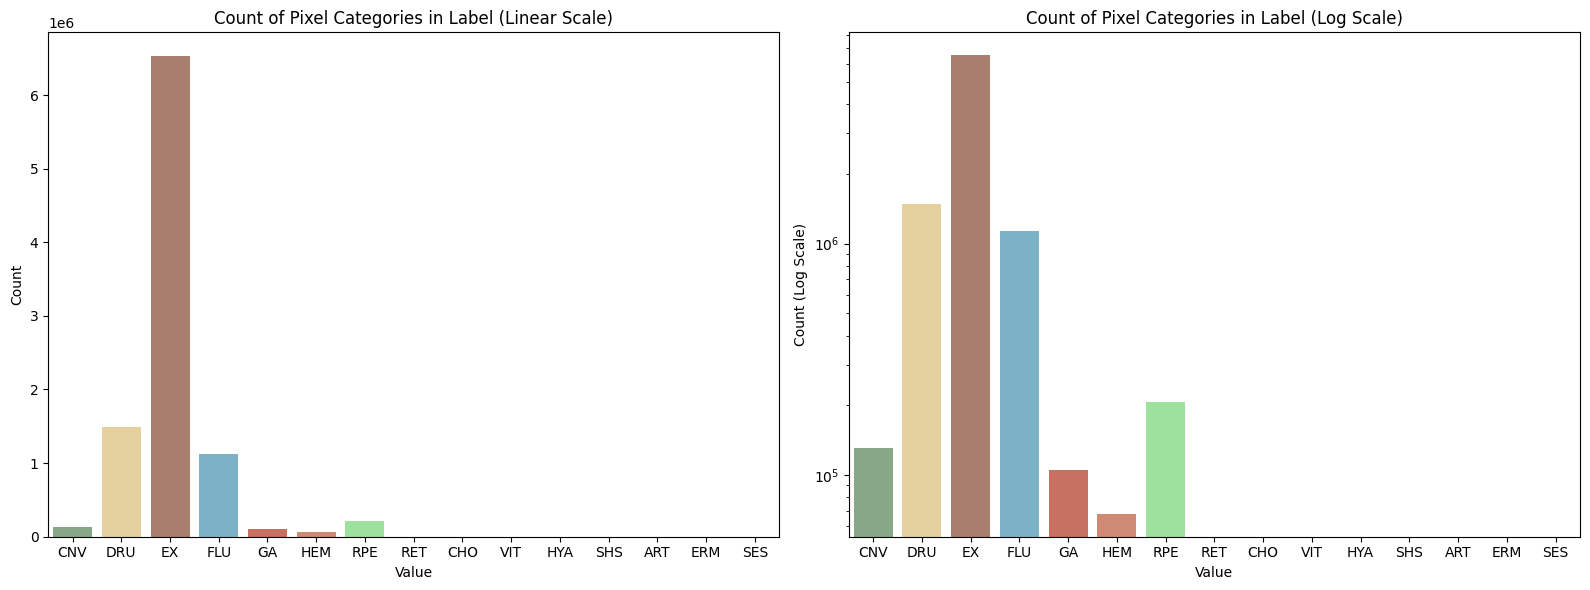

Plotting RAI02_1-38-NORMAL-8-62864_0000.tif pixels


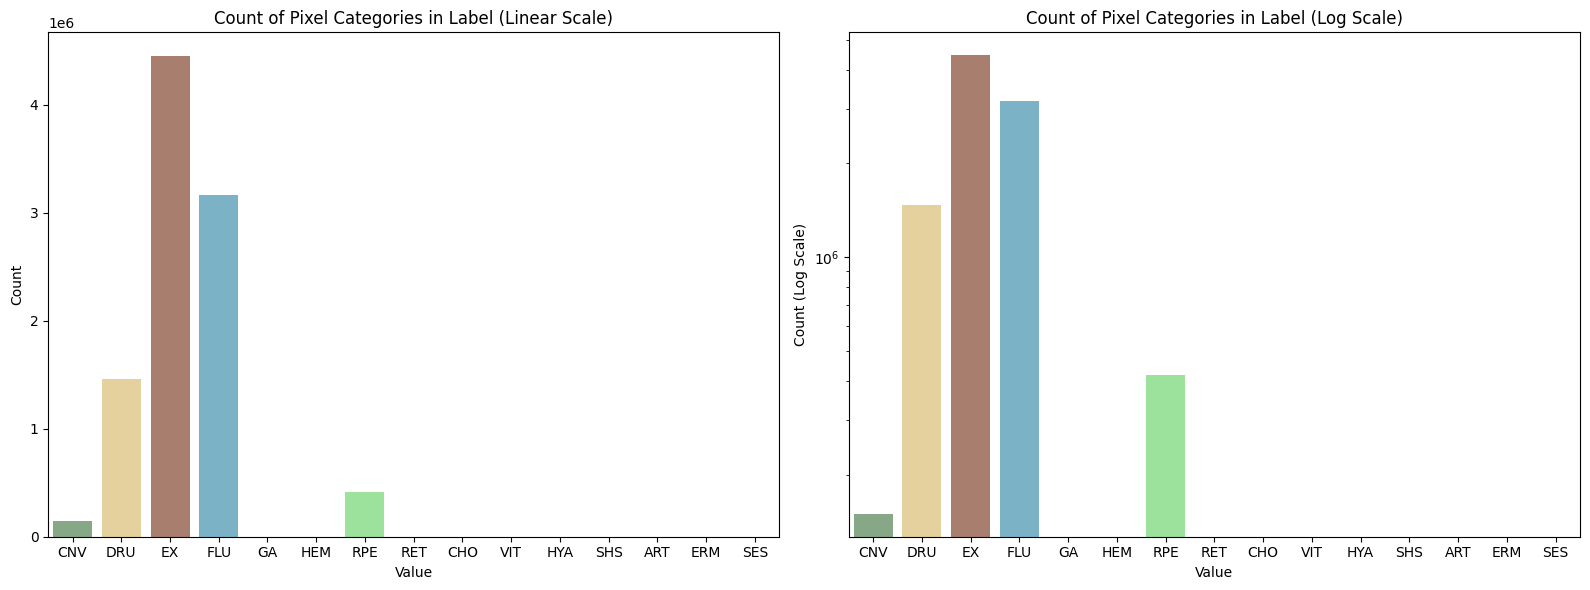

Plotting RAI02_1-167-NORMAL-2-55680_0000.tif pixels


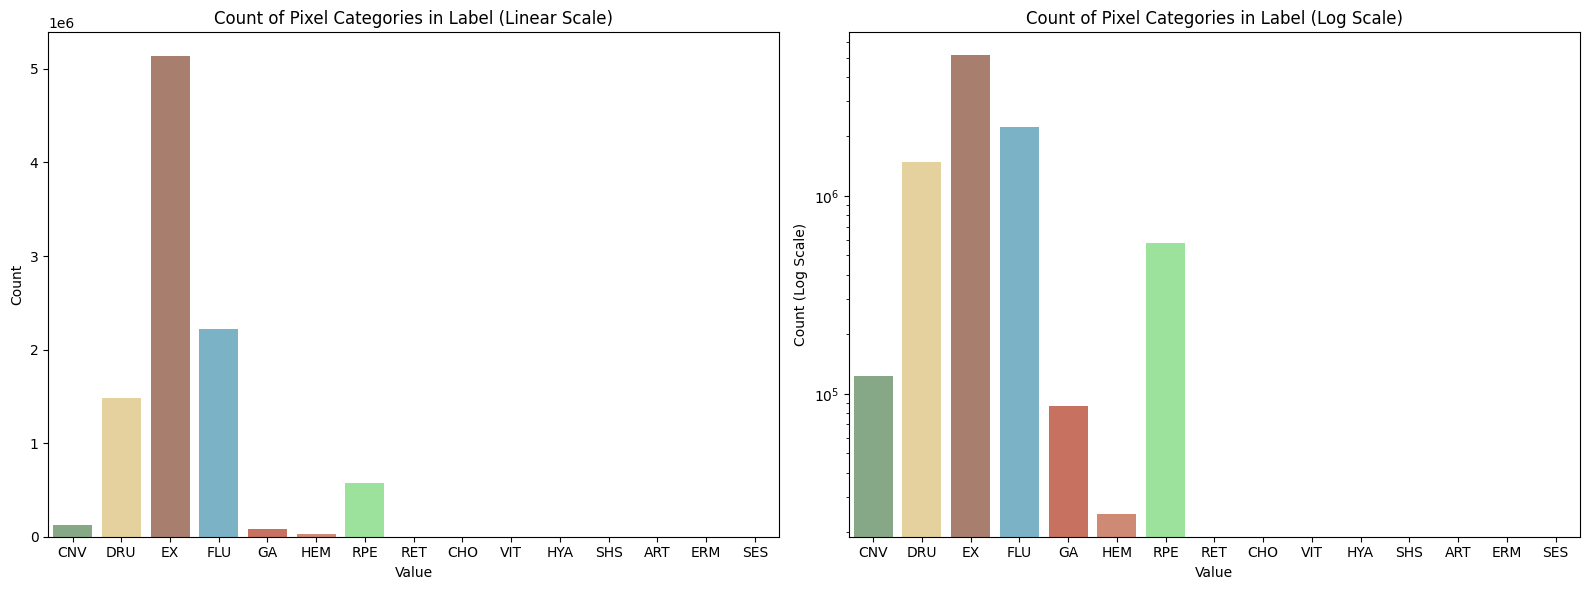

In [5]:
for f in get_filenames(path, "tif"):
    # pred_f = os.path.join(os.path.dirname(f), "predicted", "_".join(os.path.basename(f).split("_")[:-1])+".tif")
    label_f = os.path.join(label_path, "_".join(os.path.basename(f).split("_")[:-1])+".tif")

    print(f"Plotting {os.path.basename(f)} pixels")

    # pred = tiff.imread(pred_f)
    # orig = tiff.imread(f)
    label = tiff.imread(label_f)

    label_count = { i: 0 for i in range(1, 16) }

    unique_values, counts = np.unique(label, return_counts=True)
    for val, cnt in zip(unique_values, counts):
        label_count[val] = cnt
        total_label_count[val] += cnt

    plot_bar_graph(label_map, label_count, color_map)



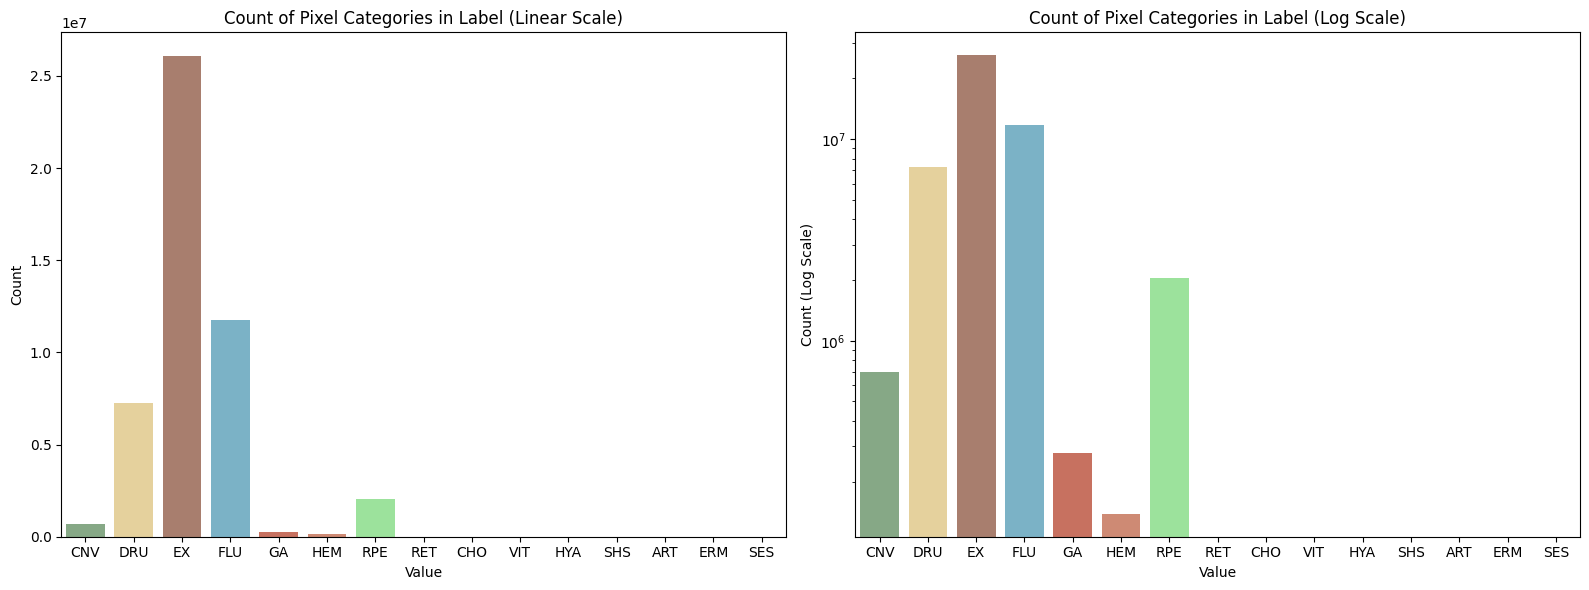

In [6]:
plot_bar_graph(label_map, total_label_count, color_map)